#### This Notebook implements various standard CF methods using the PCP procedures as input and Spesialist procedures as output

In [2]:
import numpy as np
import pandas as pd
from fastai.collab import *
from fastai.tabular import *
#from fastai.learner import *
#from fastai.column_data import *

## Load the data

In [3]:



# http://surprise.readthedocs.io/en/stable/getting_started.html
# I believe in loading all the datasets from pandas df 
# you can also load dataset from csv and whatever suits


# load the data in a form suitable for recommender system models: user, item, rating

ratings = pd.read_csv('data_processing/CF_data_train.csv') # reading data in pandas df
ratings_test = pd.read_csv('data_processing/CF_data_test.csv') # reading data in pandas df

print(ratings.head(5))

# Train data:

## to load dataset from pandas df, we need `load_fromm_df` method in surprise lib

ratings_dict = {'itemID': list(ratings.Proc),
                'userID': list(ratings.PC_enc),
                'rating': list(ratings.rating)}

df = pd.DataFrame(ratings_dict)


########################

# Test data:

## to load dataset from pandas df, we need `load_fromm_df` method in surprise lib

ratings_test_dict = {
                'userID': list(ratings_test.PC_enc),
                 'itemID': list(ratings_test.Proc),
                'rating': list(ratings_test.rating)}

df_test = pd.DataFrame(ratings_test_dict)




         PC_enc Proc  rating
0  131261087497  F15       0
1  131261087497  F27       1
2  131261087497  F30       0
3  131261087497  F16       0
4  131261087497  F14       0


### Load the data from dataframe into a data loader

In [10]:
#data = CollabDataBunch.from_df(df, seed=42, val_idxs= val_idxs)

data = CollabDataBunch.from_df(
    df, # the main dataframe data
    test=df_test, # the test dataframe
    seed=42,  # a seed for random selection of train and validation
    valid_pct=0.1, # a portion of the data for validation
    user_name='userID', # the column name for users
    item_name='itemID',  # the column name for items
    rating_name='rating' #  the column name for ratings
)

# show the data
data.show_batch()

userID,itemID,target
131142213753,F50,0.0
131236213782,F46,0.0
131026802304,F56,0.0
131251042199,F9,0.0
131067205061,F35,0.0


### Define the model parameters and find an optimum learning rate

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


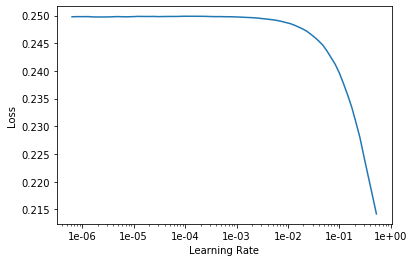

In [11]:



wd=2e-4 #weight decay
n_factors = 50 #dimension of embedding vector


learn = collab_learner(data, n_factors=40, y_range=[0, 1], wd=1e-1)

# find an appropriate learning rate
learn.lr_find()
learn.recorder.plot(skip_end=15)


### Fit the model with cross validation

In [12]:
learn.fit_one_cycle(2, 5e-3)

epoch,train_loss,valid_loss,time
0,0.037382,0.041050,00:50
1,0.040807,0.040390,00:50


### Prediction only one row of a test dataframe

In [16]:
#preds, y = learn.get_preds(ds_type=DatasetType.Test)
i= 2
P = learn.predict(df.iloc[i])
print(P, df.rating.iloc[i])

(FloatItem 0.013660908, tensor(0.0137), tensor(0.0137)) 0


In [ ]:
### Prediction on the whole test data specified in the data loader

In [21]:
P = learn.get_preds(ds_type=DatasetType.Test)
pred = P[0].data.numpy()
print(pred)

[0.011672 0.128333 0.232664 0.002647 ... 0.016082 0.007133 0.275687 0.363387]
